In [1]:
import pandas as pd
from pathlib import Path

In [2]:
results_directory = Path("./results/20260114_T7_2microns/")

In [3]:
csv_files = sorted(results_directory.glob("*.csv"))

if not csv_files:
    raise ValueError("No CSV files found in folder")

df = pd.concat(
    [pd.read_csv(f) for f in csv_files],
    ignore_index=True
)

In [4]:
df.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent'],
      dtype='object')

In [6]:
# Merge df with conditions
df_conditions = pd.read_csv("./results/20260114_T7_2microns_conditions.csv")

In [58]:
df_merged = df.merge(
    df_conditions,
    left_on="well_id",
    right_on="well_id",
    how="left"
)

# Wells in df without condition info
missing = df_merged["condition"].isna().sum()
print(f"Rows without condition: {missing}")

# Unique wells before/after
print(df["well_id"].nunique(), df_merged["well_id"].nunique())

Rows without condition: 0
12 12


In [59]:
df_merged.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent', 'condition', 'simplified'],
      dtype='object')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

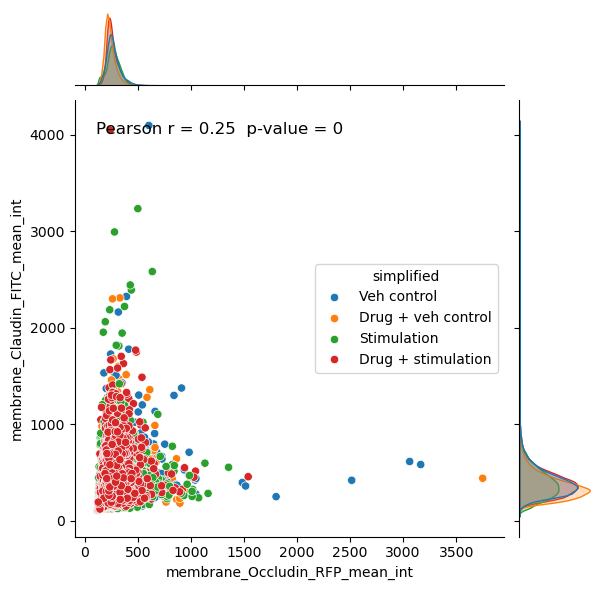

In [10]:
sns.jointplot(x='membrane_Occludin_RFP_mean_int',y='membrane_Claudin_FITC_mean_int',data=df_merged, hue='simplified')

# Calculate Pearson r and p-value
r, p = pearsonr(df_merged['membrane_Occludin_RFP_mean_int'], df_merged['membrane_Claudin_FITC_mean_int'])

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

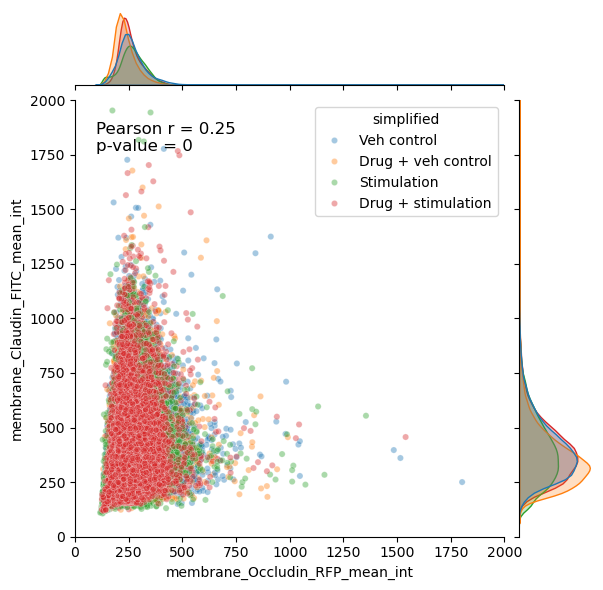

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

g = sns.jointplot(
    x='membrane_Occludin_RFP_mean_int',
    y='membrane_Claudin_FITC_mean_int',
    data=df_merged,
    hue='simplified',
    joint_kws=dict(alpha=0.4, s=20)
)

# Clip axes
g.ax_joint.set_xlim(0, 2000)
g.ax_joint.set_ylim(0, 2000)

# Pearson correlation (on full data, not clipped)
r, p = pearsonr(
    df_merged['membrane_Occludin_RFP_mean_int'],
    df_merged['membrane_Claudin_FITC_mean_int']
)

# Annotate
g.ax_joint.annotate(
    f'Pearson r = {r:.2f}\np-value = {p:.2g}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    ha='left',
    va='top',
    fontsize=12
)

plt.show()


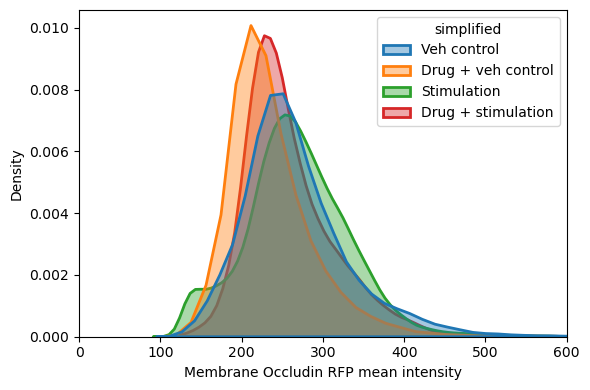

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Occludin_RFP_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 600)
plt.xlabel("Membrane Occludin RFP mean intensity")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [14]:
df_merged.columns

Index(['filename', 'well_id', 'organoid', 'multiposition_id', 'label',
       'membrane_area_x', 'membrane_Occludin_RFP_mean_int',
       'membrane_Occludin_RFP_min_int', 'membrane_Occludin_RFP_max_int',
       'membrane_Occludin_RFP_std_int', 'membrane_Occludin_RFP_max_mean_ratio',
       'membrane_Occludin_RFP_sum_int', 'membrane_area_y',
       'membrane_Claudin_FITC_mean_int', 'membrane_Claudin_FITC_min_int',
       'membrane_Claudin_FITC_max_int', 'membrane_Claudin_FITC_std_int',
       'membrane_Claudin_FITC_max_mean_ratio', 'membrane_Claudin_FITC_sum_int',
       'cell_area', 'cell_Occludin_RFP_mean_int', 'cell_Occludin_RFP_min_int',
       'cell_Occludin_RFP_max_int', 'cell_Occludin_RFP_std_int',
       'cell_Occludin_RFP_max_mean_ratio', 'cell_Occludin_RFP_sum_int',
       'organoid_area', 'organoid_perimeter', 'organoid_eccentricity',
       'organoid_solidity', 'organoid_extent', 'condition', 'simplified'],
      dtype='object')

In [60]:
df_merged = df_merged[df_merged["organoid"] != 0]
df_merged

filename well_id  organoid  multiposition_id  label  membrane_area_x  \
2            B2      B2         1                 0      3            580.0   
5            B2      B2        15                 0      6           1420.0   
6            B2      B2        15                 0      7           1555.0   
7            B2      B2        15                 0      8           1244.0   
10           B2      B2        16                 0     11            528.0   
...         ...     ...       ...               ...    ...              ...   
122631       G6      G6        10                 7   1077             68.0   
122632       G6      G6        11                 7   1078             94.0   
122633       G6      G6        12                 7   1079             75.0   
122634       G6      G6        12                 7   1080             20.0   
122636       G6      G6        13                 7   1082             30.0   

        membrane_Occludin_RFP_mean_int  membrane_Occludin_RFP_min_int  \
2                           164.425862                          101.0   
5                           227.489437                          127.0   
6                           271.224437                          135.0   
7                           244.159164                          123.0   
10                          167.850379                          117.0   
...                                ...                            ...   
122631                      207.970588                          144.0   
122632                      236.308511                          156.0   
122633                      288.986667                          210.0   
122634                      301.650000                          245.0   
122636                      207.166667                          151.0   

        membrane_Occludin_RFP_max_int  membrane_Occludin_RFP_std_int  ...  \
2                               277.0                      24.150670  ...   
5                               607.0                      53.135310  ...   
6                               807.0                      95.089907  ...   
7                               680.0                      77.958799  ...   
10                              226.0                      17.839625  ...   
...                               ...                            ...  ...   
122631                          273.0                      30.686254  ...   
122632                          336.0                      29.483146  ...   
122633                          444.0                      43.349277  ...   
122634                          379.0                      34.799820  ...   
122636                          279.0                      30.350270  ...   

        cell_Occludin_RFP_std_int  cell_Occludin_RFP_max_mean_ratio  \
2                       25.163420                          1.795133   
5                       46.991142                          2.704856   
6                       91.051339                          3.419587   
7                       74.145479                          3.136455   
10                      18.925896                          1.421965   
...                           ...                               ...   
122631                  27.689125                          1.307241   
122632                  30.097570                          1.490736   
122633                  43.692706                          1.542113   
122634                  34.799820                          1.256423   
122636                  30.467564                          1.360353   

        cell_Occludin_RFP_sum_int  organoid_area  organoid_perimeter  \
2                        254536.0         6643.0          326.007143   
5                       1243238.0        23507.0          611.185858   
6                       1261701.0        23507.0          611.185858   
7                        998855.0        23507.0          611.185858   
10                       305210.0        32

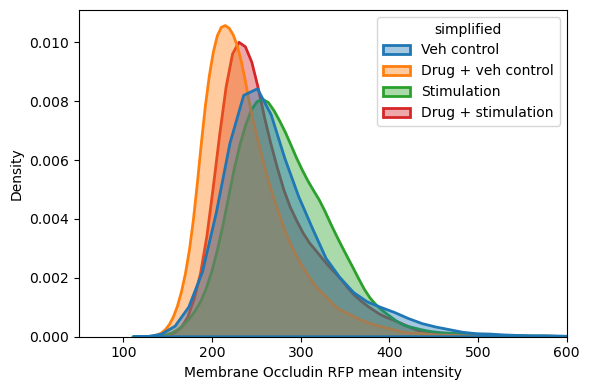

In [37]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Occludin_RFP_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(50, 600)
plt.xlabel("Membrane Occludin RFP mean intensity")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [49]:
import plotly.express as px

fig = px.box(
    df_merged,
    x="simplified",
    y="membrane_Occludin_RFP_mean_int",
    color="simplified",    # color by condition
)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title="Membrane Occludin RFP mean intensity",
    xaxis_title="",
    showlegend=False,
)

fig.update_yaxes(range=[50, 450])

fig.show()


In [48]:
fig = px.violin(
    df_merged,
    x="simplified",
    y="membrane_Occludin_RFP_mean_int",
    color="simplified",
    box=True,
)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title="Membrane Occludin RFP mean intensity",
    xaxis_title="",
    showlegend=False,
)

fig.update_yaxes(range=[50, 600])

fig.show()

In [50]:
import plotly.express as px

# aggregate mean and std
df_stats = (
    df_merged
    .groupby("simplified", as_index=False)
    .agg(
        mean_int=("membrane_Occludin_RFP_mean_int", "mean"),
        std_int=("membrane_Occludin_RFP_mean_int", "std"),
    )
)

fig = px.bar(
    df_stats,
    x="simplified",
    y="mean_int",
    error_y="std_int",
    color="simplified",
)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title="Membrane Occludin RFP mean intensity",
    xaxis_title="",
    showlegend=False,
)

fig.update_yaxes(range=[50, 600])

fig.show()


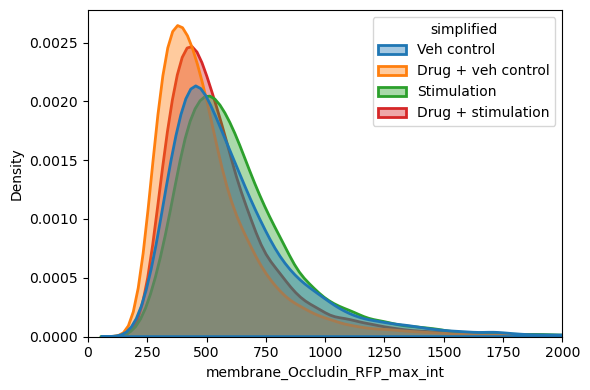

In [39]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Occludin_RFP_max_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 2000)
plt.xlabel("membrane_Occludin_RFP_max_int")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

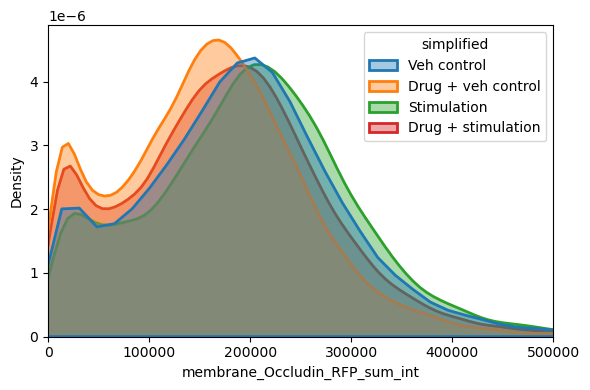

In [40]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Occludin_RFP_sum_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 500000)
plt.xlabel("membrane_Occludin_RFP_sum_int")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

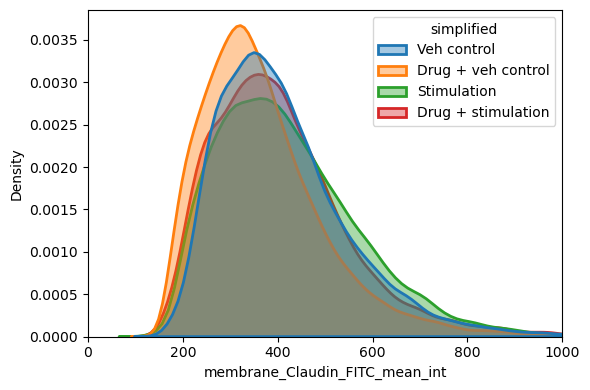

In [41]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df_merged,
    x="membrane_Claudin_FITC_mean_int",
    hue="simplified",
    fill=True,
    common_norm=False,   # important: keep per-condition densities
    alpha=0.4,
    linewidth=2
)

plt.xlim(0, 1000)
plt.xlabel("membrane_Claudin_FITC_mean_int")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

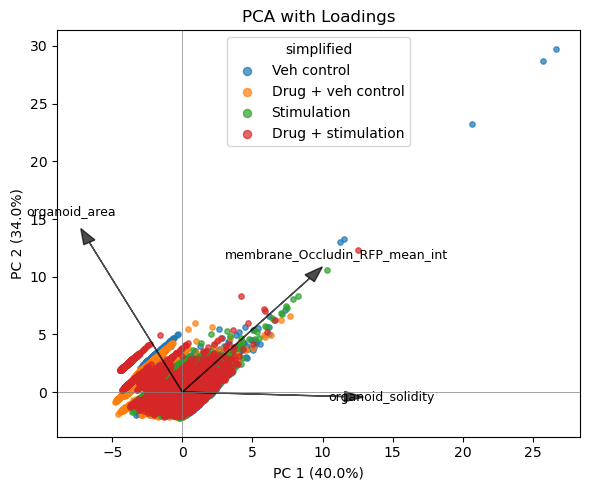

In [63]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Feature subset ---
feature_cols = [
    "membrane_Occludin_RFP_mean_int",
    "organoid_area",
    "organoid_solidity",
]

# --- Select features + labels and drop NaNs together ---
df_pca = df_merged[feature_cols + ["simplified"]].dropna()

X = df_pca[feature_cols].values
labels = df_pca["simplified"]

# --- Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# --- Explained variance ---
var = pca.explained_variance_ratio_ * 100

# --- Plot ---
plt.figure(figsize=(6, 5))

for label in labels.unique():
    mask = labels == label
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        s=15,
        alpha=0.7,
        label=label,
    )

# --- PC loadings (biplot arrows) ---
loadings = pca.components_.T  # shape: (n_features, 2)

# scale arrows to match point spread
arrow_scale = np.max(np.abs(X_pca)) * 0.6

for i, feature in enumerate(feature_cols):
    plt.arrow(
        0, 0,
        loadings[i, 0] * arrow_scale,
        loadings[i, 1] * arrow_scale,
        color="black",
        alpha=0.7,
        head_width=0.05 * arrow_scale,
        length_includes_head=True,
    )
    plt.text(
        loadings[i, 0] * arrow_scale * 1.1,
        loadings[i, 1] * arrow_scale * 1.1,
        feature,
        fontsize=9,
        ha="center",
        va="center",
    )

plt.title("PCA with Loadings")
plt.xlabel(f"PC 1 ({var[0]:.1f}%)")
plt.ylabel(f"PC 2 ({var[1]:.1f}%)")
plt.legend(title="simplified", markerscale=1.5)
plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)

plt.tight_layout()
plt.show()
